<a href="https://colab.research.google.com/github/alexanderbeleno16/APACHE_SPARK/blob/main/APACHE_SPARK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# APACHE SPARK

# **MI 2024-1 NOCTURNO**

## CORPORACIÓN UNIVERSITARIA LATINOAMERICANA

### PRESENTADO POR:

### ALEXANDER BELEÑO, VANESSA BAENA, ANDREA JABBA, STIVEN MORALES


## **Referencia del Dataset**
https://drive.google.com/file/d/1po8jV73Mm-HEdJP0KWgCbKCX-P9v1tV5/view?pli=1

## **Análisis exploratorio**

In [9]:
!pip install pyspark

In [10]:
# from google.colab import drive
# drive.mount('/content/drive')

In [11]:
!pip install -q findspark

In [12]:
import findspark
findspark.init()

In [13]:
!jps

9207 Jps
1307 SparkSubmit


In [14]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import urllib.request

# Crea una instancia de SparkSession
spark = SparkSession.builder \
    .master("local[*]") \
    .appName("Google_Colab_PySpark") \
    .getOrCreate()  # Nombre de la aplicación Spark

In [15]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
filename='/content/gdrive/MyDrive/files/BD.csv'

Mounted at /content/gdrive


In [16]:
# Lee el archivo CSV desde el sistema de archivos local en Spark
df = spark.read.csv(filename, header=True, inferSchema=True, sep=',')

# Muestra las primeras filas del DataFrame
df.show()

+------------+-----------+----------+--------------------+-------------------+----------------+---------------+--------------+--------------------+
| nombre_nodo|nombre_plan|id_consumo|dow_gigabyte_consumo|up_gigabyte_consumo|dow_rate_consumo|up_rate_consumo|uptime_consumo|            fecha_rg|
+------------+-----------+----------+--------------------+-------------------+----------------+---------------+--------------+--------------------+
|172.31.100.1|     PLAN5M| 166150122|                0.98|               0.38|            5.81|           0.24|      1h24m43s|2023-12-01 07:50:...|
|172.31.100.1|     PLAN5M| 166150121|                5.42|               0.31|            0.03|           0.01|      14h7m34s|2023-12-01 07:50:...|
|172.31.100.1|     PLAN5M| 166150120|                5.22|               0.39|             0.0|            0.0|      14h9m19s|2023-12-01 07:50:...|
|172.31.100.1|     PLAN5M| 166150119|                3.09|               0.15|             0.0|            0.0| 

In [17]:
print("Primeras 5 filas del DataFrame:")
df.show(5)

Primeras 5 filas del DataFrame:
+------------+-----------+----------+--------------------+-------------------+----------------+---------------+--------------+--------------------+
| nombre_nodo|nombre_plan|id_consumo|dow_gigabyte_consumo|up_gigabyte_consumo|dow_rate_consumo|up_rate_consumo|uptime_consumo|            fecha_rg|
+------------+-----------+----------+--------------------+-------------------+----------------+---------------+--------------+--------------------+
|172.31.100.1|     PLAN5M| 166150122|                0.98|               0.38|            5.81|           0.24|      1h24m43s|2023-12-01 07:50:...|
|172.31.100.1|     PLAN5M| 166150121|                5.42|               0.31|            0.03|           0.01|      14h7m34s|2023-12-01 07:50:...|
|172.31.100.1|     PLAN5M| 166150120|                5.22|               0.39|             0.0|            0.0|      14h9m19s|2023-12-01 07:50:...|
|172.31.100.1|     PLAN5M| 166150119|                3.09|               0.15|  

In [18]:
# Conocer las columnas del DataFrame
print("\nColumnas del DataFrame:")
df.printSchema()


Columnas del DataFrame:
root
 |-- nombre_nodo: string (nullable = true)
 |-- nombre_plan: string (nullable = true)
 |-- id_consumo: integer (nullable = true)
 |-- dow_gigabyte_consumo: double (nullable = true)
 |-- up_gigabyte_consumo: double (nullable = true)
 |-- dow_rate_consumo: double (nullable = true)
 |-- up_rate_consumo: double (nullable = true)
 |-- uptime_consumo: string (nullable = true)
 |-- fecha_rg: timestamp (nullable = true)



In [19]:
# Contar el número de filas y columnas
num_filas = df.count()
num_columnas = len(df.columns)
print(f"\nNúmero de filas: {num_filas}")
print(f"Número de columnas: {num_columnas}")


Número de filas: 67230350
Número de columnas: 9


In [20]:
df.describe().show()

+-------+------------+-----------+--------------------+--------------------+-------------------+------------------+-------------------+------------------+
|summary| nombre_nodo|nombre_plan|          id_consumo|dow_gigabyte_consumo|up_gigabyte_consumo|  dow_rate_consumo|    up_rate_consumo|    uptime_consumo|
+-------+------------+-----------+--------------------+--------------------+-------------------+------------------+-------------------+------------------+
|  count|    67230350|   67230350|            67230350|            67230350|           67230350|          67230350|           67230350|          67230350|
|   mean|        NULL|       NULL|2.0024924135975072E8|  28.976774407392934| 1.9693674352427821|1.2703520358004032|0.08705042172160608|2.5414746543778803|
| stddev|        NULL|       NULL|1.9664582446379468E7|   43.61501834880509|  4.822233983520108| 4.025980835546445| 0.9884029361159161| 1.571802231374043|
|    min|172.31.100.1|   PLAN100M|           166150091|               

In [21]:
print("\nColumnas dow_rate_consumo diferentes a 0:")
df_filtered = df.filter(df["dow_rate_consumo"] > 0)
df_filtered.show(4)


Columnas dow_rate_consumo diferentes a 0:
+------------+-----------+----------+--------------------+-------------------+----------------+---------------+--------------+--------------------+
| nombre_nodo|nombre_plan|id_consumo|dow_gigabyte_consumo|up_gigabyte_consumo|dow_rate_consumo|up_rate_consumo|uptime_consumo|            fecha_rg|
+------------+-----------+----------+--------------------+-------------------+----------------+---------------+--------------+--------------------+
|172.31.100.1|     PLAN5M| 166150122|                0.98|               0.38|            5.81|           0.24|      1h24m43s|2023-12-01 07:50:...|
|172.31.100.1|     PLAN5M| 166150121|                5.42|               0.31|            0.03|           0.01|      14h7m34s|2023-12-01 07:50:...|
|172.31.100.1|     PLAN5M| 166150118|               14.06|               1.13|            0.03|           0.06|     15h31m41s|2023-12-01 07:50:...|
|172.31.100.1|     PLAN5M| 166150115|                8.41|           

In [22]:
# Convertir el DataFrame de PySpark a Pandas
import pandas as pd
df_small = df_filtered.select("nombre_nodo", "nombre_plan", "dow_rate_consumo").limit(1000)
pdf = df_small.toPandas()


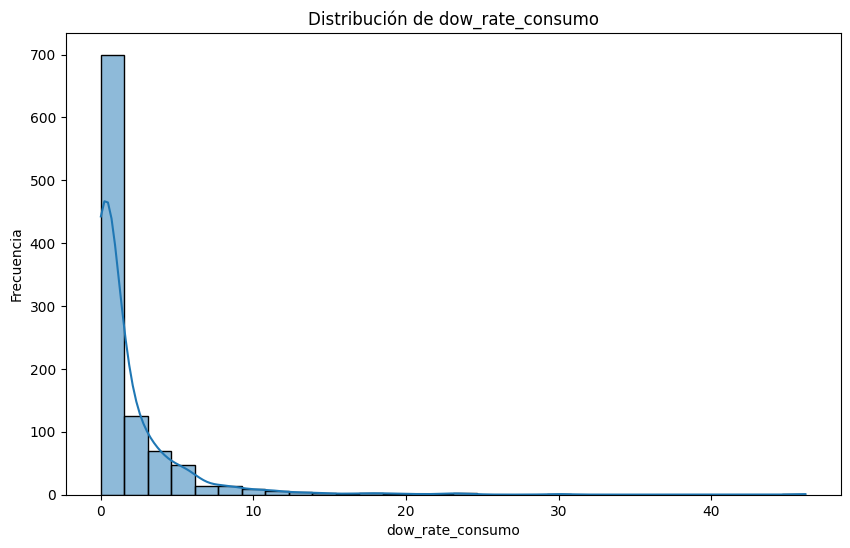

In [23]:
import seaborn as sns

# Histograma de dow_rate_consumo
plt.figure(figsize=(10, 6))
sns.histplot(pdf['dow_rate_consumo'], bins=30, kde=True)
plt.title('Distribución de dow_rate_consumo')
plt.xlabel('dow_rate_consumo')
plt.ylabel('Frecuencia')
plt.show()

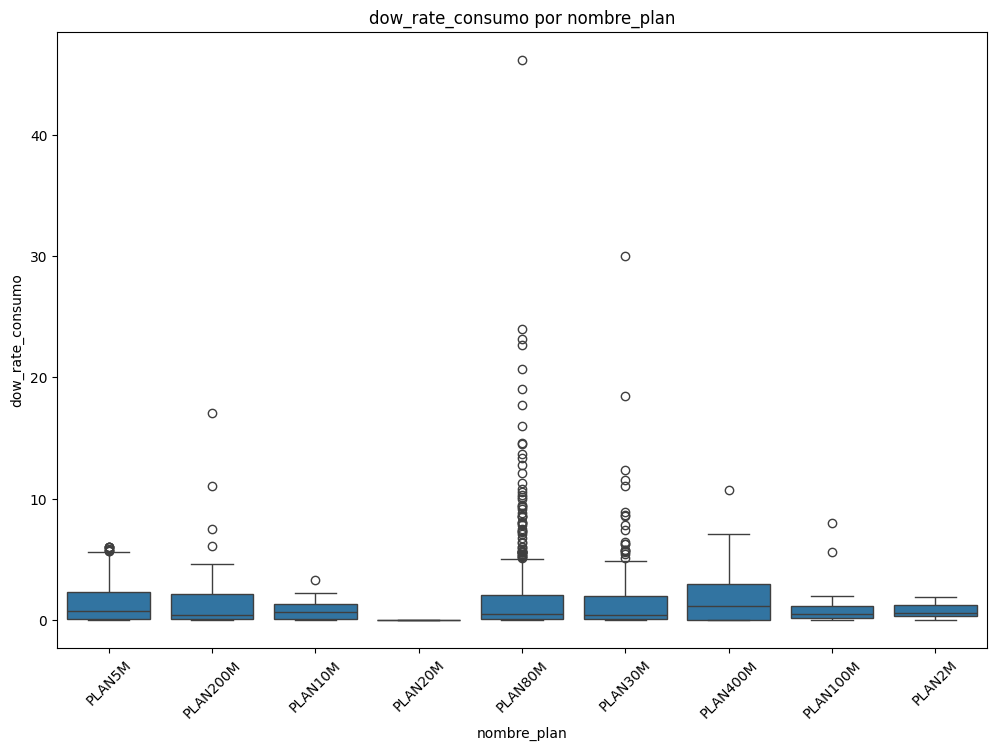

In [24]:
# Box plot de dow_rate_consumo por nombre_plan
plt.figure(figsize=(12, 8))
sns.boxplot(x='nombre_plan', y='dow_rate_consumo', data=pdf)
plt.title('dow_rate_consumo por nombre_plan')
plt.xlabel('nombre_plan')
plt.ylabel('dow_rate_consumo')
plt.xticks(rotation=45)
plt.show()

In [25]:
from pyspark.sql import functions as F
# Crear un diccionario para almacenar las modas
modes = {}

# Calcular la moda para cada columna con valores nulos y almacenarla en el diccionario
for col_name in df.columns:
    mode_value = df.groupBy(col_name).count().orderBy(F.desc("count")).first()[0]
    modes[col_name] = mode_value

## Preprocesamiento
Filtrar por cada columna, todos los valores nulos para luego reemplazarlos por la moda de cada columna correspondiente

In [26]:
from pyspark.sql.types import TimestampType
# Función auxiliar para reemplazar valores nulos en columnas de tipo Timestamp
def fill_nulls_with_mode(df, modes):
    for col_name, mode_value in modes.items():
        if df.schema[col_name].dataType == TimestampType():
            df = df.withColumn(col_name, F.when(F.col(col_name).isNull(), F.lit(mode_value).cast(TimestampType())).otherwise(F.col(col_name)))
        else:
            df = df.fillna({col_name: mode_value})
    return df

# Reemplazar los valores nulos con la moda correspondiente
df_filled = fill_nulls_with_mode(df, modes)

# Verificar que no haya valores nulos restantes
df_filled.show()

+------------+-----------+----------+--------------------+-------------------+----------------+---------------+--------------+--------------------+
| nombre_nodo|nombre_plan|id_consumo|dow_gigabyte_consumo|up_gigabyte_consumo|dow_rate_consumo|up_rate_consumo|uptime_consumo|            fecha_rg|
+------------+-----------+----------+--------------------+-------------------+----------------+---------------+--------------+--------------------+
|172.31.100.1|     PLAN5M| 166150122|                0.98|               0.38|            5.81|           0.24|      1h24m43s|2023-12-01 07:50:...|
|172.31.100.1|     PLAN5M| 166150121|                5.42|               0.31|            0.03|           0.01|      14h7m34s|2023-12-01 07:50:...|
|172.31.100.1|     PLAN5M| 166150120|                5.22|               0.39|             0.0|            0.0|      14h9m19s|2023-12-01 07:50:...|
|172.31.100.1|     PLAN5M| 166150119|                3.09|               0.15|             0.0|            0.0| 

## Normalización

In [27]:
from pyspark.ml.feature import MinMaxScaler
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

# Listar las columnas numéricas que quieres normalizar
numeric_cols = [col_name for col_name, dtype in df_filled.dtypes if dtype in ['int', 'double']]
numeric_cols.remove('dow_rate_consumo')

# Inicializar el VectorAssembler
assembler = VectorAssembler(inputCols=numeric_cols, outputCol="features")

# Transformar el DataFrame en un vector de características
df_vector = assembler.transform(df_filled)

# Inicializar el MinMaxScaler
scaler = MinMaxScaler(inputCol="features", outputCol="scaled_features")

# Ajustar el scaler al DataFrame y transformar los datos
scaler_model = scaler.fit(df_vector)
df_scaled = scaler_model.transform(df_vector)

# Seleccionar solo las columnas necesarias para el modelo
df_model = df_scaled.select("features", "dow_rate_consumo")

## Separación de pruebas y entrenamiento

In [28]:
# Dividir los datos en entrenamiento (80%) y prueba (20%)
# train_df, test_df = df_model.randomSplit([0.8, 0.2], seed=42)
train_df, test_df = df_model.randomSplit([0.2, 0.1], seed=42)

# Mostrar la cantidad de registros en cada conjunto
print("Cantidad de registros en el conjunto de entrenamiento:", train_df.count())
print("Cantidad de registros en el conjunto de prueba:", test_df.count())

Cantidad de registros en el conjunto de entrenamiento: 44819413
Cantidad de registros en el conjunto de prueba: 22410937


## Entrenamiento del modelo

In [ ]:
from pyspark.ml.regression import GBTRegressor

# Crear el modelo GBTRegressor
gbt = GBTRegressor(featuresCol="features", labelCol="dow_rate_consumo", maxIter=100)

# Entrenar el modelo
gbt_model = gbt.fit(train_df)


## Evaluación del modelo

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator

# Hacer predicciones en los datos de prueba
predictions = gbt_model.transform(test_df)

# Crear un evaluador para medir la exactitud del modelo
evaluator = RegressionEvaluator(labelCol="dow_rate_consumo", predictionCol="prediction", metricName="rmse")

# Calcular el RMSE (Root Mean Squared Error)
rmse = evaluator.evaluate(predictions)
print(f"Root Mean Squared Error (RMSE) en los datos de prueba = {rmse}")


## Mostrar las predicciones

In [ ]:
predictions.select("dow_rate_consumo", "prediction", "features").show(10)
